## Wrangling WeRateDogs Dataset 
#### Project No.4 / Hanan AlTuwaijri

### Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#Gather">Gathering Data</a></li>
    <li><a href="#Assess">Assessing Data </a></li>
    <li><a href="#Clean">Cleaning Data </a></li>
    <li><a href="#stor">Storing and Acting on Wrangled Data </a></li>
</ul>

<a id='intro'></a>
### Introduction

> 
>
>**My goal:** wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations.\
>
>**Data Overview**:
>The Twitter archive is great, but it only contains very basic tweet information.
Additional gathering( Twitter APIs , online files ..etc), then assessing and cleaning is required for neat analyses and visualizations. \
>
> - **Enhanced Twitter Archive** :The WeRateDogs Twitter archive contains basic tweet data 2356 tweets .
>>  tweet_id: the unique identifier for each tweet \
in_reply_to_status_id: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID \
in_reply_to_user_id: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID \
timestamp: time when this Tweet was created \
source: utility used to post the Tweet, as an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client \
text: actual UTF-8 text of the status update \
retweeted_status_id: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID \
retweeted_status_user_id: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID \
retweeted_status_timestamp: time of retweet \
expanded_urls: tweet URL \
rating_numerator: numerator of the rating of a dog. Note: ratings almost always greater than 10 \
rating_denominator: denominator of the rating of a dog. Note: ratings almost always have a denominator of 10 \
name: name of the dog \
doggo: one of the 4 dog "stage" \
floofer: one of the 4 dog "stage" \
pupper: one of the 4 dog "stage" \
puppo: one of the 4 dog "stage" 
> - **Image Predictions File** : a table full of image predictions  
>>  tweet_id | is the last part of the tweet URL \
    p1 |is the algorithm's prediction for the image in the tweet \
    p1_conf | is how confident the algorithm is in its prediction \
    p1_dog | is whether or not the prediction is a breed of dog \
    p2 | is the algorithm's second most likely prediction \
    p2_conf | is how confident the algorithm is in its prediction \ 
    p2_dog | is whether or not the prediction is a breed of dog \
>
>
> In my wrangling I will follow this **Key points**:
> 
>   - I only want original ratings (no retweets) that have images.  
>   - the requirements of this project are only to assess and clean 
>   at least 8 quality issues and at least 2 tidiness issues in this dataset. 
>   - The fact that the rating numerators are greater than the denominators does not need to be cleaned. \
      *(This unique rating system is a big part of the popularity of WeRateDogs)* 
>   - I do not need to gather the tweets beyond August 1st, 2017 becouse won't be able to gather the image predictions      for these tweets since I don't have access to the algorithm used.



In [3]:
import tweepy
import json
import pandas as pd
import numpy as np
import os
import requests
from PIL import Image
from io import BytesIO

<a id='Gather'></a>
### Gathering Data
Gather data from a variety of sources and in a variety of formats

>Source Number 1 : **extract Local file** Data Type 1 : **CSV**

In [4]:
# import *local* file (Twitter-archive-enhanced.csv) 
df_twit_arch=pd.read_csv('twitter-archive-enhanced.csv')
df_twit_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

id – The numerical ID of the status
in_reply_to_status_id – The ID of an existing status that the update is in reply to


>Source Number 2 : **Download file from the internet** "is hosted on Udacity's servers"    Data Type 2 : **TSV** 

In [5]:
#initiate the dataframe and the URL for our file
df_image=pd.DataFrame()
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

#download (image_predictions.tsv) programmatically using the Requests library
response=requests.get(url)

with open('image_predictions.tsv', mode='wb') as file :
    file.write(response.content)
    
# read the image_prediction data to pandas dataframe
df_image=pd.read_csv('image_predictions.tsv' ,sep='\t')
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


>Source Number 3 : **Access Twitter APIs** Data Type 1 : **JSON** Using Tweepy

In [4]:
# Twitter APIs 


#Twitter credentials for the app

consumer_key = 'Hidden'
consumer_secret = 'Hidden'
access_token = 'Hidden'
access_secret = 'Hidden'

#pass twitter credentials to tweepy

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)


In [110]:
#Make a list for the Tweets id from tweet-archive file we have , to gather additional data via Twitter's API
ids_list=df_twit_arch.tweet_id.values
len(ids_list)

2356

In [113]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
from timeit import default_timer as timer

count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet-json.txt', 'w') as outfile:
    for tweet_id in ids_list:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Fail
1045: 743609206067040256
Fail
1046: 743595368194129920
Fail
1047: 743545585370791937
Fail
1048: 743510151680958465
Fail
1049: 743253157753532416
Fail
1050: 743222593470234624
Fail
1051: 743210557239623680
Fail
1052: 742534281772302336
Fail
1053: 742528092657332225
Fail
1054: 742465774154047488
Fail
1055: 742423170473463808
Fail
1056: 742385895052087300
Fail
1057: 742161199639494656
Fail
1058: 742150209887731712
Fail
1059: 741793263812808706
Fail
1060: 741743634094141440
Fail
1061: 741438259667034112
Fail
1062: 741303864243200000
Fail
1063: 741099773336379392
Fail
1064: 741067306818797568
Fail
1065: 740995100998766593
Fail
1066: 740711788199743490
Fail
1067: 740699697422163968
Fail
1068: 740676976021798912
Fail
1069: 740373189193256964
Fail
1070: 740365076218183684
Fail
1071: 740359016048689152
Fail
1072: 740214038584557568
Fail
1073: 739979191639244800
Fail
1074: 739932936087216128
Fail
1075: 739844404073074688
Fail
1076: 739623569819336705
Fail
1077: 739606147276148736
Fail
1078:

Fail
1319: 706538006853918722
Fail
1320: 706516534877929472
Fail
1321: 706346369204748288
Fail
1322: 706310011488698368
Fail
1323: 706291001778950144
Fail
1324: 706265994973601792
Fail
1325: 706169069255446529
Fail
1326: 706166467411222528
Fail
1327: 706153300320784384
Fail
1328: 705975130514706432
Fail
1329: 705970349788291072
Fail
1330: 705898680587526145
Fail
1331: 705786532653883392
Fail
1332: 705591895322394625
Fail
1333: 705475953783398401
Fail
1334: 705442520700944385
Fail
1335: 705428427625635840
Fail
1336: 705239209544720384
Fail
1337: 705223444686888960
Fail
1338: 705102439679201280
Fail
1339: 705066031337840642
Fail
1340: 704871453724954624
Fail
1341: 704859558691414016
Fail
1342: 704847917308362754
Fail
1343: 704819833553219584
Fail
1344: 704761120771465216
Fail
1345: 704499785726889984
Fail
1346: 704491224099647488
Fail
1347: 704480331685040129
Fail
1348: 704364645503647744
Fail
1349: 704347321748819968
Fail
1350: 704134088924532736
Fail
1351: 704113298707505153
Fail
1352:

Success
1583: 687109925361856513
Success
1584: 687102708889812993
Success
1585: 687096057537363968
Success
1586: 686947101016735744
Success
1587: 686760001961103360
Success
1588: 686749460672679938
Success
1589: 686730991906516992
Success
1590: 686683045143953408
Success
1591: 686618349602762752
Success
1592: 686606069955735556
Success
1593: 686394059078897668
Success
1594: 686386521809772549
Success
1595: 686377065986265092
Success
1596: 686358356425093120
Success
1597: 686286779679375361
Success
1598: 686050296934563840
Success
1599: 686035780142297088
Success
1600: 686034024800862208
Success
1601: 686007916130873345
Success
1602: 686003207160610816
Success
1603: 685973236358713344
Success
1604: 685943807276412928
Success
1605: 685906723014619143
Success
1606: 685681090388975616
Success
1607: 685667379192414208
Success
1608: 685663452032069632
Success
1609: 685641971164143616
Success
1610: 685547936038666240
Success
1611: 685532292383666176
Success
1612: 685325112850124800
Success
16

Success
1832: 676215927814406144
Success
1833: 676191832485810177
Success
1834: 676146341966438401
Success
1835: 676121918416756736
Success
1836: 676101918813499392
Success
1837: 676098748976615425
Success
1838: 676089483918516224
Success
1839: 675898130735476737
Success
1840: 675891555769696257
Success
1841: 675888385639251968
Success
1842: 675878199931371520
Success
1843: 675870721063669760
Success
1844: 675853064436391936
Success
1845: 675849018447167488
Success
1846: 675845657354215424
Success
1847: 675822767435051008
Success
1848: 675820929667219457
Success
1849: 675798442703122432
Success
1850: 675781562965868544
Success
1851: 675740360753160193
Success
1852: 675710890956750848
Success
1853: 675707330206547968
Success
1854: 675706639471788032
Success
1855: 675534494439489536
Success
1856: 675531475945709568
Success
1857: 675522403582218240
Success
1858: 675517828909424640
Success
1859: 675501075957489664
Success
1860: 675497103322386432
Success
1861: 675489971617296384
Success
18

Success
2081: 670823764196741120
Success
2082: 670822709593571328
Success
2083: 670815497391357952
Success
2084: 670811965569282048
Success
2085: 670807719151067136
Success
2086: 670804601705242624
Success
2087: 670803562457407488
Success
2088: 670797304698376195
Success
2089: 670792680469889025
Success
2090: 670789397210615808
Success
2091: 670786190031921152
Success
2092: 670783437142401025
Success
2093: 670782429121134593
Success
2094: 670780561024270336
Success
2095: 670778058496974848
Success
2096: 670764103623966721
Success
2097: 670755717859713024
Success
2098: 670733412878163972
Success
2099: 670727704916926465
Success
2100: 670717338665226240
Success
2101: 670704688707301377
Success
2102: 670691627984359425
Success
2103: 670679630144274432
Success
2104: 670676092097810432
Success
2105: 670668383499735048
Success
2106: 670474236058800128
Success
2107: 670468609693655041
Success
2108: 670465786746662913
Success
2109: 670452855871037440
Success
2110: 670449342516494336
Success
21

Success
2330: 666373753744588802
Success
2331: 666362758909284353
Success
2332: 666353288456101888
Success
2333: 666345417576210432
Success
2334: 666337882303524864
Success
2335: 666293911632134144
Success
2336: 666287406224695296
Success
2337: 666273097616637952
Success
2338: 666268910803644416
Success
2339: 666104133288665088
Success
2340: 666102155909144576
Success
2341: 666099513787052032
Success
2342: 666094000022159362
Success
2343: 666082916733198337
Success
2344: 666073100786774016
Success
2345: 666071193221509120
Success
2346: 666063827256086533
Success
2347: 666058600524156928
Success
2348: 666057090499244032
Success
2349: 666055525042405380
Success
2350: 666051853826850816
Success
2351: 666050758794694657
Success
2352: 666049248165822465
Success
2353: 666044226329800704
Success
2354: 666033412701032449
Success
2355: 666029285002620928
Success
2356: 666020888022790149
Success
1432.5324946670007


In [116]:
len(fails_dict)

607

In [6]:
# For loop to append each tweet into a list
tweets_data = []

tweet_file = open('tweet-json.txt', "r")

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()

> Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count."Each tweet's retweet count and favorite ("like") count at minimum"

In [7]:
#Create a DataFrame with the requires features
# Add selected variables to tweet_info DataFrame
twet_df=pd.DataFrame()

twet_df['tweet_id'] = list(map(lambda tweet: tweet['id'], tweets_data))
twet_df['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
twet_df['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

In [8]:
twet_df.head(5)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7637,35946
1,892177421306343426,5648,31024
2,891815181378084864,3744,23343
3,891689557279858688,7809,39235
4,891327558926688256,8403,37481


<a id='Assess'></a>
### Assessing Data

*The requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset*

A- Detect\
B- Document 


Check the 3 datasets : \
**1-twitter-archive-enhanced Dataset**

In [9]:
#to check the types and the null values 
df_twit_arch.info()
#to assess the data visually (I used Excel)
df_twit_arch.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1959,673576835670777856,NaN,NaN,2015-12-06 18:56:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Sun burnt dog here. Quite large. Wants to prom...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673576835...,7,10,None,None,None,None,None
1552,688916208532455424,NaN,NaN,2016-01-18 02:49:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper just wants to say hello. 11/10 wou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688916208...,11,10,None,None,None,pupper,None
1133,728751179681943552,NaN,NaN,2016-05-07 00:59:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Flurpson. He can't believe it's not bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728751179...,10,10,Flurpson,None,None,None,None
1498,692417313023332352,NaN,NaN,2016-01-27 18:42:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Herschel. He's slightly bigger than ur av...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,None,None,pupper,None
61,880221127280381952,NaN,NaN,2017-06-29 00:27:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jesse. He's a Fetty Woof. His tongue ejec...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880221127...,12,10,Jesse,None,None,None,None


In [10]:
df_twit_arch.retweeted_status_id.count()

181

In [40]:
df_twit_arch.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [143]:
df_twit_arch.name.isna().sum()

0

In [153]:
df_twit_arch.describe()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [189]:
#from the minimun there is tweet without rating 
df_twit_arch[df_twit_arch.rating_numerator == 0]
#315 and 1016 
df_twit_arch.iloc[315].expanded_urls
#after checking the url it was not dogs images or plagiarism post 
df_twit_arch.iloc[315].tweet_id,df_twit_arch.iloc[1016].tweet_id

(835152434251116546, 746906459439529985)

In [192]:
df_twit_arch.expanded_urls.isnull().sum()

59

In [238]:
df_twit_arch.tweet_id.duplicated().sum()

0

**2-image_predictions Dataset**

In [11]:
#to check the types and the null values 
df_image.info()
#to assess the data visually (I used Excel)
df_image.sample(5) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1019,710140971284037632,https://pbs.twimg.com/media/Cdrtcr-W4AAqi5H.jpg,1,Pekinese,0.953170,True,papillon,0.019517,True,Japanese_spaniel,0.005821,True
307,671533943490011136,https://pbs.twimg.com/media/CVHEju0XAAEUZRY.jpg,1,hen,0.556524,False,cock,0.442033,False,black_swan,0.001181,False
1193,740214038584557568,https://pbs.twimg.com/media/CkXEu2OUoAAs8yU.jpg,1,Chesapeake_Bay_retriever,0.586414,True,Labrador_retriever,0.189782,True,vizsla,0.067607,True
1587,798209839306514432,https://pbs.twimg.com/media/CxPPnCYWIAAo_ao.jpg,1,Pekinese,0.524583,True,Shih-Tzu,0.102931,True,Pomeranian,0.097893,True
369,672970152493887488,https://pbs.twimg.com/media/CVbeyGUU8AEq300.jpg,1,leaf_beetle,0.340154,False,rhinoceros_beetle,0.139698,False,crayfish,0.058034,False


**3-twitter-API-Data Dataset**

In [12]:
#to check the types and the null values 
twet_df.info()
twet_df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        1749 non-null   int64
 1   retweet_count   1749 non-null   int64
 2   favorite_count  1749 non-null   int64
dtypes: int64(3)
memory usage: 41.1 KB


,tweet_id,retweet_count,favorite_count
223,847962785489326080,4950,23106
451,817120970343411712,2621,12333
1071,682059653698686977,1656,4878
1517,670374371102445568,253,718
928,689993469801164801,443,1449


#### observations
- Quality 

1-There is 181 Retweets in the dataset.  \
2-In the name column Wrong name was taken after (this is) and its not names, e.g. "a", "an", "in". \
3-Wronge data type for timestamp feature.  \
4-There are some tweets beyond August 1st, 2017. \
5-Source data have an extra HTML format. \
6-No need to the retweets columns after filtering ()\
7-Tweets with this ID 835152434251116546, 746906459439529985 have no rating\
8-59 tweets without image (expended URL)
**image_predictions Dataset** \
9- Some of the image not for dogs 

 

- Tidiness\
1- Column headers(doggo,floofer,pupper,puppo) are values, not variable names.\
2- Data for same tweets is stored in 3 tables (twet_df , df_image , df_twit_arch ) \
**image_predictions Dataset** \
3- there ia so many Confident columns and breed prediction. 


<a id='Clean'></a>
### Clean



In [273]:
#make a copy of or original datasets 
clean_twet_df=twet_df.copy()
clean_df_image=df_image.copy()
clean_df_twit_arch=df_twit_arch.copy()

#### Tidiness 1  :

**Define**

Marage the 3 Datasets *(clean_twet_df,clean_df_image,clean_df_twit_arch)* are belonge to each other as one Table.

**Code**

In [274]:
clean_df = pd.merge(clean_df_twit_arch,clean_df_image, on=['tweet_id'], how='left')
clean_df = pd.merge(clean_df,clean_twet_df, on=['tweet_id'], how='left')

#### Test

In [275]:
list(clean_df.columns)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'retweet_count',
 'favorite_count']

------

#### Tidiness 2  :

**Define**

Create new column {dog_stage} contain this values (doggo,floofer,pupper,puppo)

*Copyright\ https://github.com/malmusfer*

**Code**

In [276]:
#First replace None in stage columns with empty string
clean_df.doggo.replace('None', '', inplace=True)
clean_df.floofer.replace('None', '', inplace=True)
clean_df.pupper.replace('None', '', inplace=True)
clean_df.puppo.replace('None', '', inplace=True)

In [277]:
#Then combine stage columns
clean_df['stage'] = clean_df.doggo + clean_df.floofer + clean_df.pupper + clean_df.puppo

In [278]:
#Then format entries with multiple dog stages
clean_df.loc[clean_df.stage == 'doggopupper', 'stage'] = 'doggo,pupper' 
clean_df.loc[clean_df.stage == 'doggopuppo', 'stage'] = 'doggo,puppo' 
clean_df.loc[clean_df.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

#### Test

In [279]:
clean_df.stage.value_counts()

                 1976
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

------

**Quality 1:** There is 181 Retweets in the dataset.


**Define**

 Delete the retweets which have data in this.columns (retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp)


**Code**

In [280]:
# there is 181 row need to drop of 2356 
clean_df.shape[0]
#aAfter droping 2175 row
clean_df=clean_df[clean_df.retweeted_status_id.isnull()]

#### Test

In [281]:
print(clean_df.retweeted_status_id.count(),
clean_df.retweeted_status_timestamp.count(),
clean_df.retweeted_status_user_id.count())

0 0 0


------

**Quality 2:** In the name column Wrong name was taken after (this is) and its not names, e.g. "a", "an", "in".


**Define**

Replace the randmoe strings in **Name** column like(a , an ,that ... etc) with "None"

**Code**

In [282]:
#creat Msask with this invalide names 
not_name=clean_df.loc[(clean_df['name'].str.islower())].name
not_name.value_counts()

a               55
the              8
an               6
one              4
very             4
quite            3
just             3
getting          2
actually         2
not              2
this             1
officially       1
life             1
old              1
my               1
light            1
mad              1
unacceptable     1
incredibly       1
such             1
his              1
space            1
by               1
all              1
infuriating      1
Name: name, dtype: int64

In [283]:
# rename no valid words with None name
clean_df.loc[:,'name'].replace(not_name,'None',inplace=True)

#### Test

In [284]:
clean_df['name'].str.islower().sum()

0

------

**Quality 3:** Wronge data type for timestamp feature.


**Define**

Changing timestamp feature typefrom Object to Datetime 

**Code**

In [285]:
clean_df['timestamp'] = pd.to_datetime(clean_df['timestamp']) 

#### Test

In [286]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

------

**Quality 4:** There are some tweets beyond August 1st, 2017.


**Define**

Delete that records before 1/8/2017

**Code**

In [287]:
# filter the rows and cut them 
date = '2017-08-01 00:00:00'
clean_df = clean_df[(clean_df['timestamp'] < date)]

#### Test

In [288]:
clean_df[(clean_df['timestamp'] > date)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,stage


------

**Quality 5:** Source data have an extra HTML format.

**Define**

Extract the Souce from the html link 

**Code**

In [289]:
clean_df['source'] = clean_df['source'].str.extract('^<a.+>(.+)</a>$')

#### Test

In [290]:
clean_df['source'].value_counts()

Twitter for iPhone     2040
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

------

**Quality 6:** No need to the retweets columns after filtering 

**Define**

**Code**

In [291]:
clean_df.drop(['retweeted_status_id' , 'retweeted_status_user_id','retweeted_status_timestamp'] , axis = 1 , inplace = True)

#### Test

In [292]:
list(clean_df)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'retweet_count',
 'favorite_count',
 'stage']

------

**Quality 7:** Tweets with this ID 835152434251116546, 746906459439529985 have no rating

**Define**

Drop this two tweets without ratings

**Code**

In [293]:
clean_df.drop(clean_df.loc[clean_df['tweet_id']==835152434251116546].index, inplace=True)
clean_df.drop(clean_df.loc[clean_df['tweet_id']==746906459439529985].index, inplace=True)

#### Test

In [294]:
clean_df.loc[clean_df['tweet_id']==746906459439529985]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,stage


------

**Quality 8:** 59 tweets without image (expended URL) image_predictions Dataset

**Define**

Delete that tweets without images

**Code**

In [295]:
clean_df = clean_df[pd.notnull(clean_df['expanded_urls'])]

#### Test

In [296]:
clean_df['expanded_urls'].isnull().sum()

0

------

**Quality 9:** Some of the image not for dogs

**Define**

check the images with one True prediction at least .. then ignore ant non-dog records 

**Code**

In [297]:
is_adog=clean_df.query('p1_dog == True or  p2_dog == True or p3_dog == True ')
clean_df=is_adog

#### Test

In [298]:
clean_df.query('p1_dog == False and  p2_dog == False and p3_dog == False')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,stage


------

**Tidiness 3 :** There is so many Confident columns and breed prediction

**Define**

Setup the conditions for selection \ Set the choice order based on the selection conditions for predicted breed, and\ Set the choice order for confidence level based on the selection conditions\ Select the predicted breed based on the first successful condition.\ Select the predicted confidence level based on the first successful condition & Set breed as 'none' and confidence to 0 for any cases where all 3 prediction flags are False.

*Copyright\ https://github.com/malmusfer*

**Code**

In [299]:
# setup the conditions for selection
conditions = [(clean_df['p1_dog'] == True), (clean_df['p2_dog'] == True), (clean_df['p3_dog'] == True)]

In [300]:
# set the choice order based on the selection conditions for predicted breed
choices_breed = [clean_df['p1'],clean_df['p2'],clean_df['p3']]

In [301]:
# set the choice order for confidence level based on the selection conditions
choices_confidence = [clean_df['p1_conf'], clean_df['p2_conf'], clean_df['p3_conf']]

In [302]:
# select the predicted breed based on the first successful condition
clean_df['breed'] = np.select(conditions, choices_breed, default = 'none')

In [303]:
# select the predicted confidence level based on the first successful condition
clean_df['confidence'] = np.select(conditions, choices_confidence, default = 0)

#### Test

In [304]:
list(clean_df)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'retweet_count',
 'favorite_count',
 'stage',
 'breed',
 'confidence']

In [305]:
clean_df=clean_df.drop(['p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog'],axis=1)

In [309]:
clean_df[['confidence' ,'breed']]

,confidence,breed
2,0.716012,Chihuahua
3,0.168086,Labrador_retriever
4,0.555712,basset
5,0.425595,Chesapeake_Bay_retriever
6,0.341703,Appenzeller
...,...,...
2351,0.560311,miniature_pinscher
2352,0.408143,Rhodesian_ridgeback
2353,0.596461,German_shepherd
2354,0.506826,redbone


<a id='stor'></a>
### Storing and Acting on Wrangled Data

In [322]:
# Drop any column not effective in our acting
Act_df=pd.DataFrame()
Act_df=clean_df.drop(['in_reply_to_status_id','in_reply_to_user_id','pupper','doggo','floofer','puppo','img_num','expanded_urls'] , axis=1)

In [323]:
Act_df

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,jpg_url,retweet_count,favorite_count,stage,breed,confidence
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,3744.0,23343.0,,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,7809.0,39235.0,,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,8403.0,37481.0,,basset,0.555712
5,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,13,10,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,2820.0,18891.0,,Chesapeake_Bay_retriever,0.425595
6,890971913173991426,2017-07-28 16:27:12+00:00,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1837.0,10975.0,,Appenzeller,0.341703
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,40.0,96.0,,miniature_pinscher,0.560311
2352,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,6,10,None,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,130.0,270.0,,Rhodesian_ridgeback,0.408143
2353,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,9,10,None,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,41.0,111.0,,German_shepherd,0.596461
2354,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,7,10,None,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,42.0,120.0,,redbone,0.506826


In [324]:
Act_df.to_csv('twitter_archive_master.csv', index = False)

### Analysis and visualization 

In [377]:
#call the library that I need in this step 
import re
import matplotlib.pyplot as plt
from IPython.display import IFrame
IFrame(src="https://jasongrout.org", width='100%', height='500px')
Act_df = Act_df.reset_index(drop=True)
Act_df.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,confidence
count,1.684000e+03,1684.000000,1684.000000,1234.000000,1234.000000,1684.000000
mean,7.391232e+17,11.479810,10.535036,2667.341167,9590.405186,0.550389
std,6.790394e+16,8.106698,6.949993,4352.844119,13152.956606,0.299111
min,6.660209e+17,1.000000,2.000000,11.000000,70.000000,0.000010
25%,6.773338e+17,10.000000,10.000000,452.250000,1345.250000,0.303305
50%,7.131767e+17,11.000000,10.000000,1397.000000,4928.500000,0.550749
75%,7.931544e+17,12.000000,10.000000,3216.250000,13200.000000,0.822062
max,8.918152e+17,165.000000,150.000000,56174.000000,132219.000000,0.999956


In [367]:
Act_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1684 entries, 2 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1684 non-null   int64              
 1   timestamp           1684 non-null   datetime64[ns, UTC]
 2   source              1684 non-null   object             
 3   text                1684 non-null   object             
 4   rating_numerator    1684 non-null   int64              
 5   rating_denominator  1684 non-null   int64              
 6   name                1684 non-null   object             
 7   jpg_url             1684 non-null   object             
 8   retweet_count       1234 non-null   float64            
 9   favorite_count      1234 non-null   float64            
 10  stage               1684 non-null   object             
 11  breed               1684 non-null   object             
 12  confidence          1684 non-null 

In [384]:
Act_df

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,jpg_url,retweet_count,favorite_count,stage,breed,confidence
0,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,3744.0,23343.0,,Chihuahua,0.716012
1,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,7809.0,39235.0,,Labrador_retriever,0.168086
2,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,8403.0,37481.0,,basset,0.555712
3,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,13,10,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,2820.0,18891.0,,Chesapeake_Bay_retriever,0.425595
4,890971913173991426,2017-07-28 16:27:12+00:00,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1837.0,10975.0,,Appenzeller,0.341703
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,40.0,96.0,,miniature_pinscher,0.560311
1680,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,6,10,None,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,130.0,270.0,,Rhodesian_ridgeback,0.408143
1681,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,9,10,None,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,41.0,111.0,,German_shepherd,0.596461
1682,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,7,10,None,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,42.0,120.0,,redbone,0.506826


In [378]:
#Dog with the top retweets counts
maxretweet =Act_df.retweet_count.max()
#the data for this dog
Act_df.loc[Act_df['retweet_count'] == maxretweet]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,jpg_url,retweet_count,favorite_count,stage,breed,confidence
361,807106840509214720,2016-12-09 06:17:20+00:00,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 ...,13,10,Stephan,https://pbs.twimg.com/ext_tw_video_thumb/80710...,56174.0,119789.0,,Chihuahua,0.50537


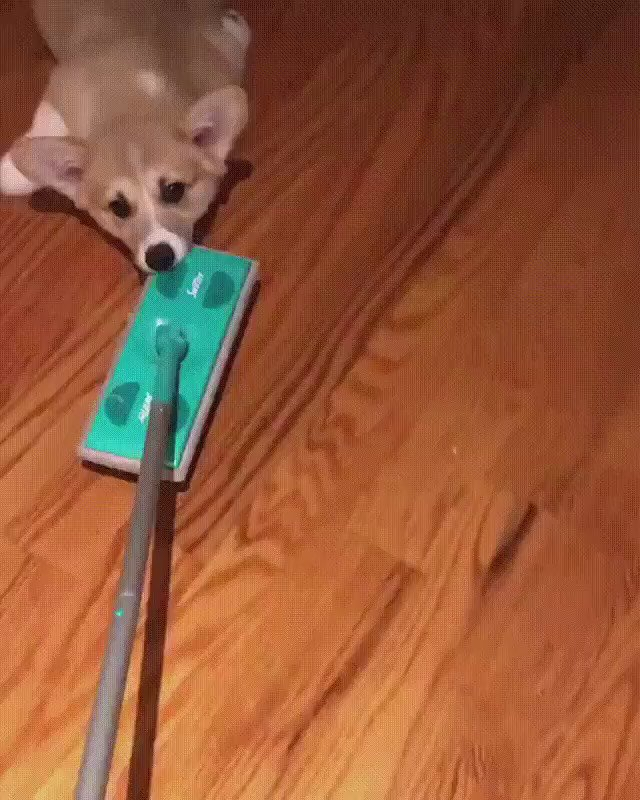

In [386]:

from IPython.display import Image 

Image(Act_df.jpg_url.iloc[361])


In [380]:
#Dog with the top favorite counts
maxfav =Act_df.favorite_count.max()
Act_df.loc[Act_df['favorite_count'] == maxfav]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,jpg_url,retweet_count,favorite_count,stage,breed,confidence
276,822872901745569793,2017-01-21 18:26:02+00:00,Twitter for iPhone,Here's a super supportive puppo participating ...,13,10,None,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,43443.0,132219.0,puppo,Lakeland_terrier,0.196015


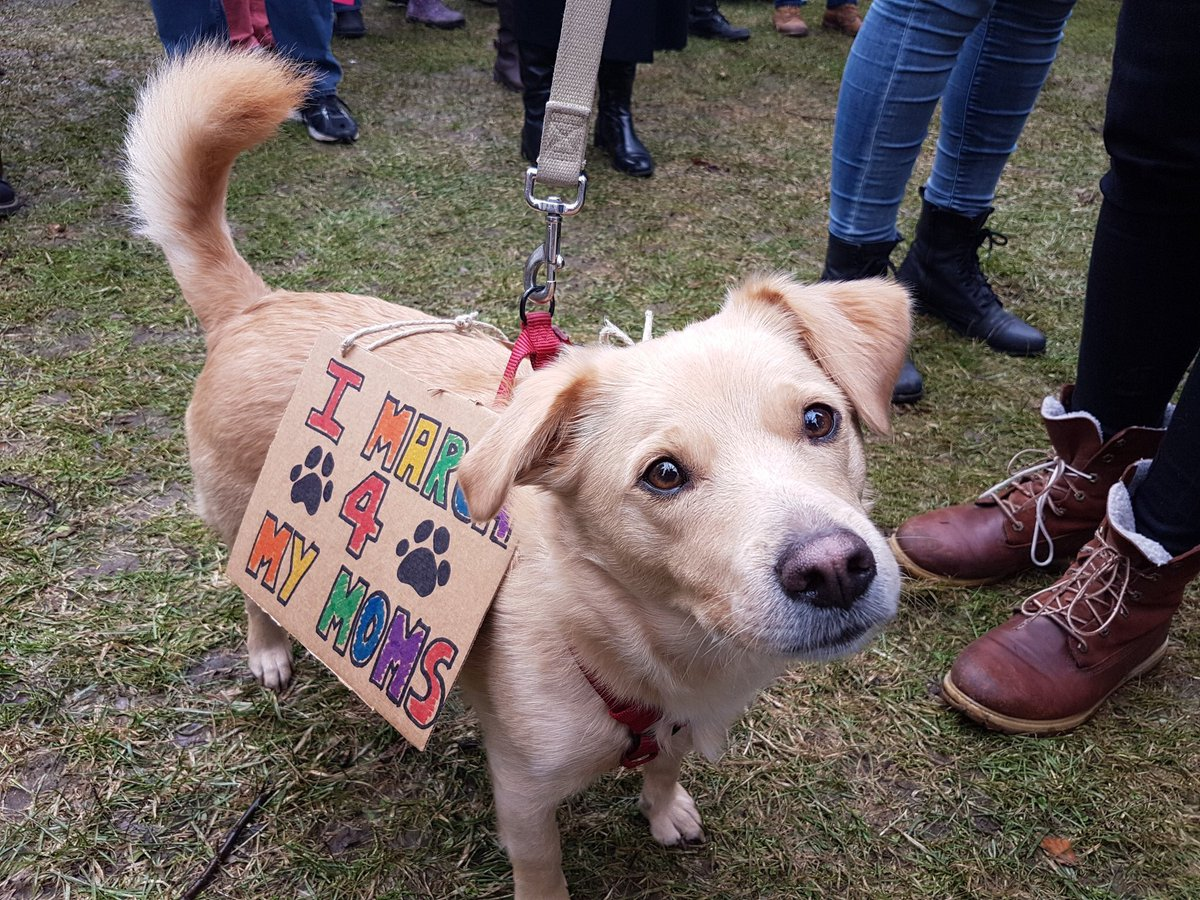

In [381]:
from IPython.display import Image 

Image(Act_df.jpg_url.iloc[276])

**observation :** both of top retweeted and top favored dogs have this rating ( 13/10)

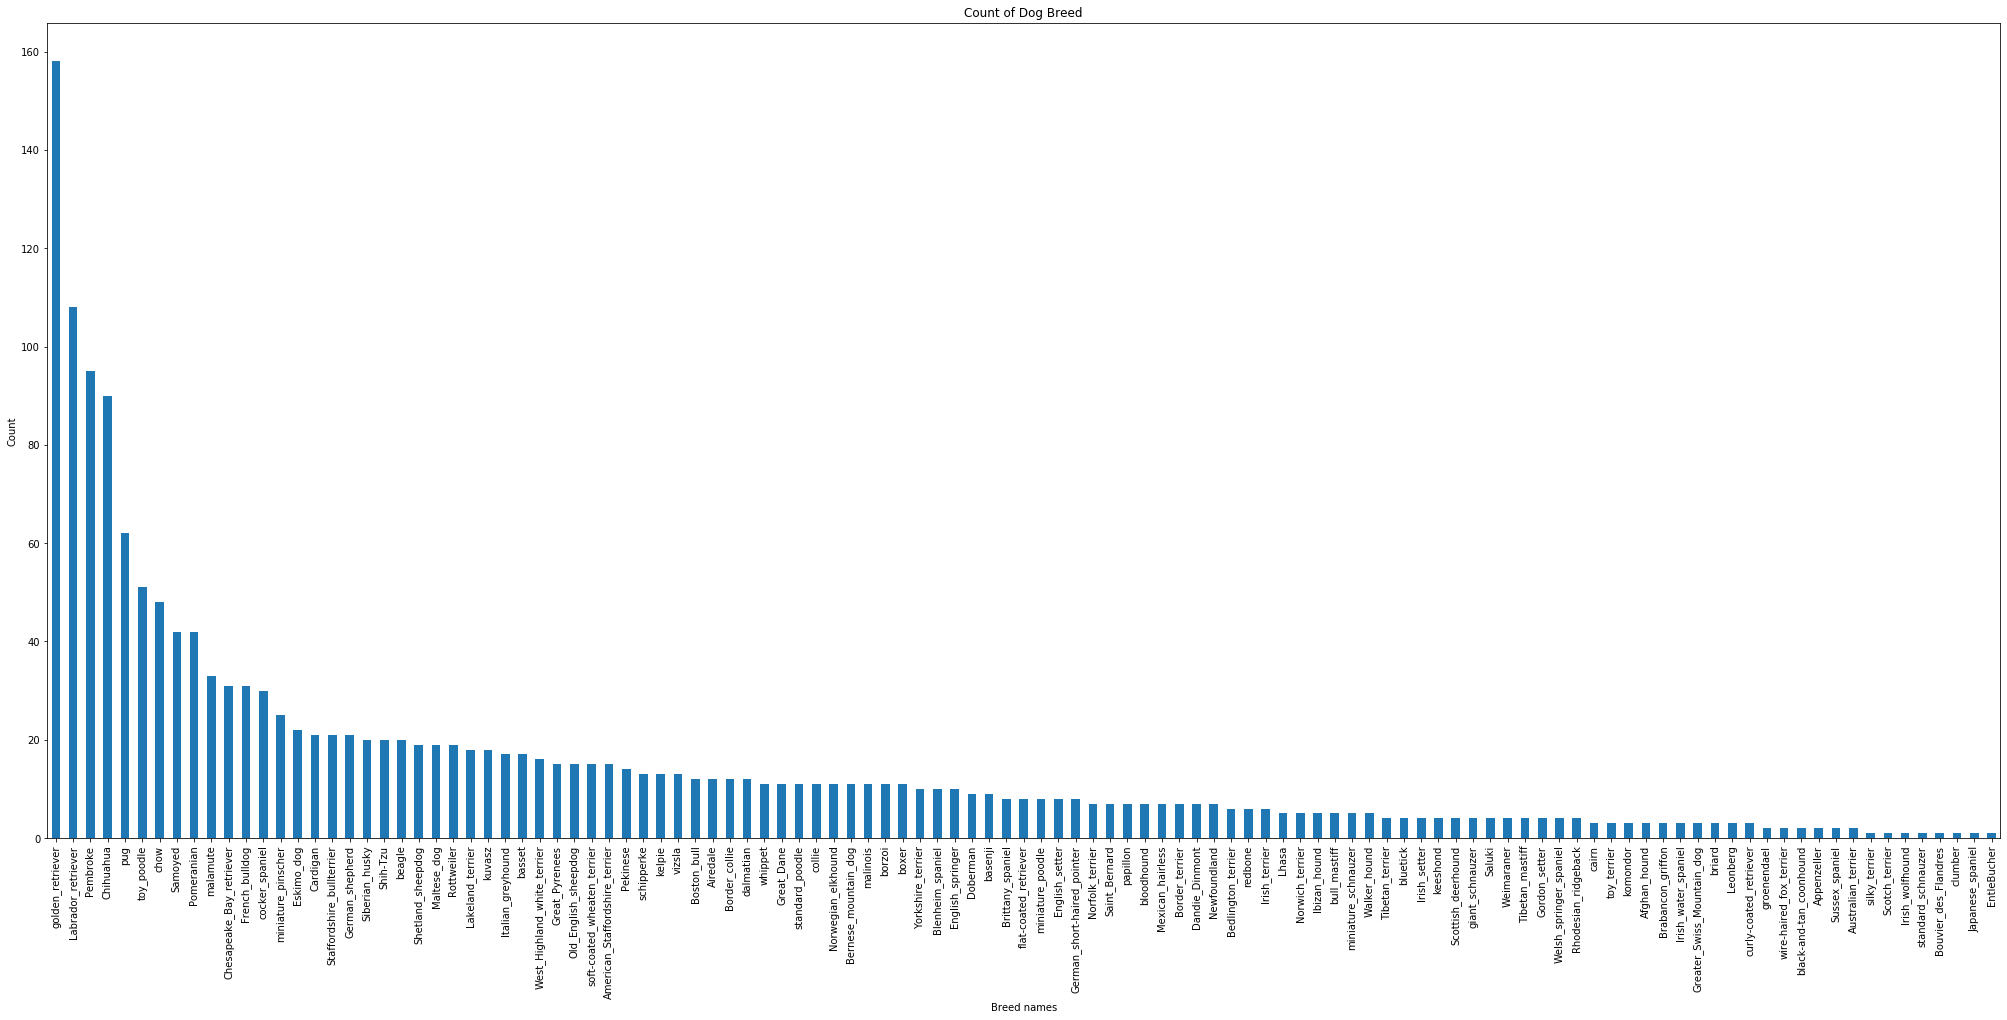

In [434]:
#number of each breed type 
Act_df['breed'].value_counts().plot(kind='bar',figsize=(35,15))
plt.title("Count of Dog Breed")
plt.xlabel('Breed names')
plt.ylabel('Count')
plt.savefig('breed_count.png')


**Observation :** Minimum count was for *EntleBucher* with less than 20 and the max count Golden retriever with more than 150 count